In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/fgvc-aircraft/archives/fgvc-aircraft-2013b.tar.gz
!tar -xvf fgvc-aircraft-2013b.tar.gz
!ls fgvc-aircraft-2013b/data/images

Streaming output truncated to the last 5000 lines.
fgvc-aircraft-2013b/data/images/1446337.jpg
fgvc-aircraft-2013b/data/images/0498976.jpg
fgvc-aircraft-2013b/data/images/1942531.jpg
fgvc-aircraft-2013b/data/images/1378453.jpg
fgvc-aircraft-2013b/data/images/1272696.jpg
fgvc-aircraft-2013b/data/images/2199430.jpg
fgvc-aircraft-2013b/data/images/1060226.jpg
fgvc-aircraft-2013b/data/images/1315041.jpg
fgvc-aircraft-2013b/data/images/0097119.jpg
fgvc-aircraft-2013b/data/images/1715545.jpg
fgvc-aircraft-2013b/data/images/1161496.jpg
fgvc-aircraft-2013b/data/images/0554933.jpg
fgvc-aircraft-2013b/data/images/1001809.jpg
fgvc-aircraft-2013b/data/images/1215515.jpg
fgvc-aircraft-2013b/data/images/0809559.jpg
fgvc-aircraft-2013b/data/images/0114420.jpg
fgvc-aircraft-2013b/data/images/0907378.jpg
fgvc-aircraft-2013b/data/images/1148553.jpg
fgvc-aircraft-2013b/data/images/0369472.jpg
fgvc-aircraft-2013b/data/images/1196802.jpg
fgvc-aircraft-2013b/data/images/1045405.jpg
fgvc-aircraft-2013b/data/

In [ ]:
!git clone https://github.com/arjish/PreTrainedFullLibrary_FewShot.git
%cd PreTrainedFullLibrary_FewShot/
!mkdir data

Cloning into 'PreTrainedFullLibrary_FewShot'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 55 (delta 31), reused 25 (delta 11), pack-reused 0
Unpacking objects: 100% (55/55), 24.15 KiB | 634.00 KiB/s, done.
/content/PreTrainedFullLibrary_FewShot/PreTrainedFullLibrary_FewShot


/content/fgvc-aircraft-2013b/data/images/0730798.jpg


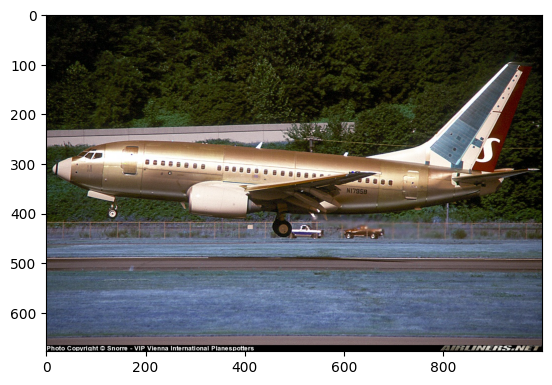

/content/fgvc-aircraft-2013b/data/images/1152062.jpg


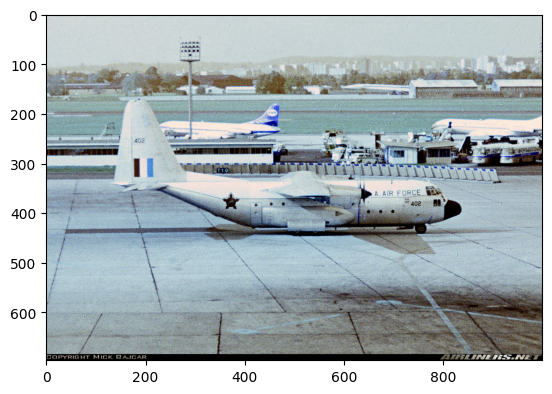

/content/fgvc-aircraft-2013b/data/images/0736232.jpg


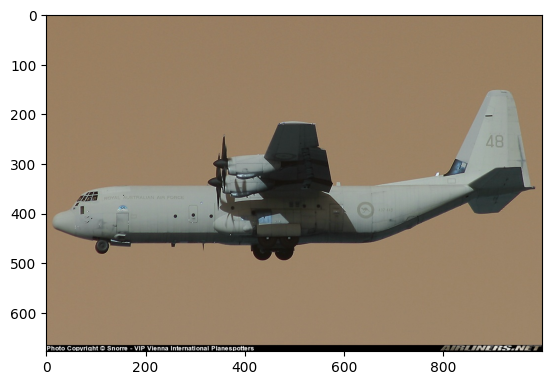

/content/fgvc-aircraft-2013b/data/images/1527504.jpg


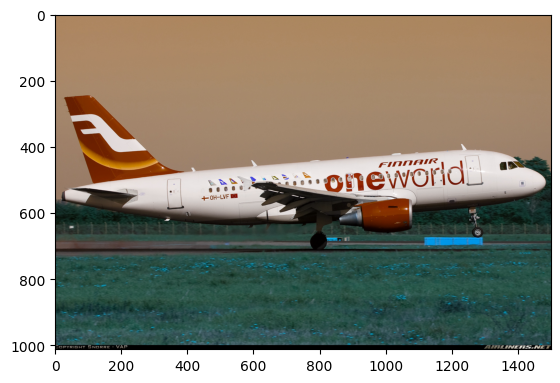

/content/fgvc-aircraft-2013b/data/images/1834899.jpg


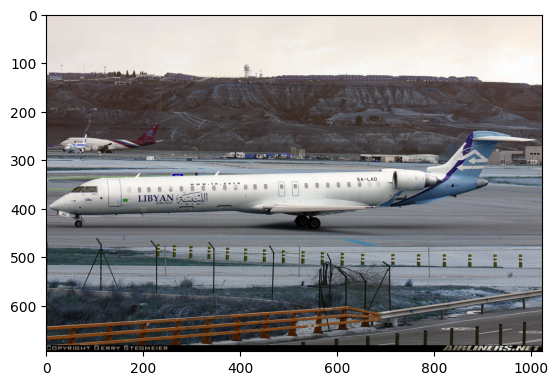

/content/fgvc-aircraft-2013b/data/images/1254669.jpg


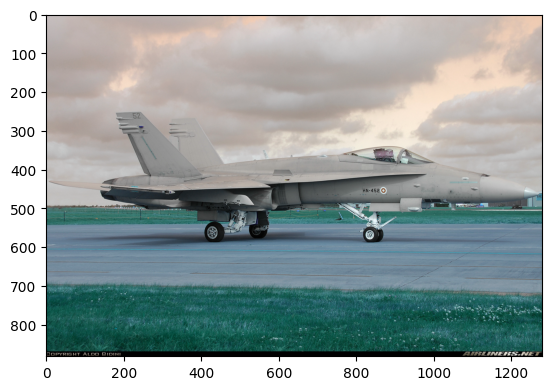

In [ ]:
import cv2 
import matplotlib.pyplot as plt
from pathlib import Path
data_dir = Path("/content/fgvc-aircraft-2013b/data/images/")
for i, img_file in enumerate(data_dir.iterdir()):
    print(img_file)
    img = cv2.imread(str(img_file))
    plt.imshow(img)
    plt.show()
    if i ==5:
        break

# Prepare data

In [ ]:
def readlines(fp:str) -> list[str]:
    with open(fp, 'r') as f:
        lines = f.read().splitlines()
    return lines
classes = readlines("/content/fgvc-aircraft-2013b/data/families.txt")
len(classes)

70

In [ ]:
test_set = readlines("/content/fgvc-aircraft-2013b/data/images_family_test.txt")
len(test_set)

3333

In [ ]:
from sklearn.utils import shuffle
test_set = shuffle(test_set)[:500]
test_set

['2158992 Yak-42',
 '1135019 Spitfire',
 '1230221 Challenger 600',
 '1237648 King Air',
 '0885624 EMB-120',
 '0974359 Tu-134',
 '2169120 Challenger 600',
 '1572354 Boeing 747',
 '1318171 Boeing 767',
 '1291370 MD-80',
 '2190977 Embraer E-Jet',
 '1658296 SR-20',
 '2094829 Boeing 747',
 '0157278 Cessna 208',
 '1194590 MD-80',
 '1080160 Boeing 737',
 '1113454 ATR-72',
 '1736223 Boeing 737',
 '1594759 Il-76',
 '0065207 DC-10',
 '0875337 C-130',
 '0447766 Embraer ERJ 145',
 '0485221 Dash 8',
 '1120498 F/A-18',
 '1377250 DC-9',
 '2207626 Boeing 737',
 '1379570 A380',
 '1847505 A340',
 '1374624 PA-28',
 '0123337 Fokker 100',
 '0988971 Challenger 600',
 '1928761 DR-400',
 '0912525 Spitfire',
 '0894206 BAE 146',
 '0730396 Beechcraft 1900',
 '0694464 DC-8',
 '1000027 Fokker 70',
 '1813838 A320',
 '0065780 A300',
 '0345784 Embraer ERJ 145',
 '1326471 Dash 8',
 '0278439 Dornier 328',
 '1615914 Boeing 737',
 '1345223 C-47',
 '1273293 Tu-154',
 '1010412 PA-28',
 '1418231 Boeing 737',
 '1918575 Falco

In [ ]:
import shutil
from pathlib import Path
data_dir = Path("/content/fgvc-aircraft-2013b/data/images/")
save_dir = Path("/content/PreTrainedFullLibrary_FewShot/data")
for t in test_set:
    t_ = t.split(" ")
    img_name, cls_name = t_[0], "_".join(t_[1:]).replace("-", "_").replace("/","_")
    save_dir_sub = save_dir.joinpath(cls_name)
    save_dir_sub.mkdir(exist_ok=True)
    save_path = save_dir_sub.joinpath(img_name+".jpg")
    img_path = data_dir.joinpath(img_name+".jpg")
    shutil.copy2(str(img_path), str(save_path))
    # print(img_name, cls_name)


# Train

In [ ]:
!rm -rf /content/PreTrainedFullLibrary_FewShot/data/transferred_features_all

In [ ]:
!python extract_pretrained_features.py /content/PreTrainedFullLibrary_FewShot -f data


	 Working on model: resnet18
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:00<00:00, 161MB/s] 
Initializing Datasets and Dataloaders...
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes 

In [ ]:
!mv /content/PreTrainedFullLibrary_FewShot/transferred_features_data /content/PreTrainedFullLibrary_FewShot/data/transferred_features_all

In [ ]:
!python classifier_single.py data --model resnet18 --nway 5 --kshot 1 --kquery 15 --num_epochs 200 --n_problems 600 --hidden_size 512 --lr 0.001 --gamma 0.2

Traceback (most recent call last):
  File "/content/PreTrainedFullLibrary_FewShot/classifier_single.py", line 170, in <module>
    main()
  File "/content/PreTrainedFullLibrary_FewShot/classifier_single.py", line 131, in main
    features_query, labels_query = get_features_fewshot_single(sampled_folders,
TypeError: get_features_fewshot_single() missing 1 required positional argument: 'labels'


In [ ]:
!python classifier_full_library.py data --nway 20 --kshot 5 --kquery 15 --num_epochs 100 --n_problems 600 --hidden_size 512 --lr 0.0005 --gamma 0.1

0.0
6.38
0.0
6.06
2.78
0.0
0.0
2.17
5.88
0.0
0.0
0.0
0.0
2.78
2.33
6.25
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.82
2.86
9.68
0.0
3.33
0.0
2.33
2.27
6.98
0.0
3.03
0.0
0.0
0.0
0.0
0.0
5.0
0.0
0.0
0.0
5.41
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.26
0.0
2.94
5.26
0.0
5.71
0.0
0.0
0.0
0.0
0.0
2.5
0.0
0.0
0.0
2.56
0.0
0.0
3.33
0.0
0.0
0.0
3.85
0.0
0.0
10.81
0.0
2.7
0.0
4.17
2.94
6.12
0.0
0.0
1.89
2.17
2.38
2.63
0.0
0.0
0.0
4.76
0.0
0.0
0.0
0.0
2.27
0.0
0.0
0.0
0.0
0.0
0.0
0.0
17.5
0.0
0.0
0.0
2.44
4.55
11.36
7.14
0.0
7.89
0.0
5.0
0.0
0.0
0.0
0.0
0.0
0.0
2.22
2.86
0.0
3.12
3.12
7.32
0.0
3.85
0.0
19.51
0.0
0.0
4.76
0.0
0.0
0.0
0.0
2.78
5.41
4.35
3.12
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.57
0.0
0.0
0.0
4.44
0.0
2.38
0.0
0.0
16.67
0.0
0.0
2.33
5.0
0.0
0.0
2.22
0.0
0.0
0.0
0.0
0.0
0.0
6.98
0.0
0.0
5.88
0.0
0.0
0.0
8.57
0.0
0.0
0.0
13.16
19.51
0.0
5.88
0.0
0.0
0.0
0.0
0.0
0.0
11.36
3.03
0.0
2.94
0.0
2.44
16.67
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.57
0.0
0.0
2.

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1Oo-rorvE151o38zoidjH2KywC3t1VZPK/view?usp=drivesdk

Downloading...
From: https://drive.google.com/uc?id=1Oo-rorvE151o38zoidjH2KywC3t1VZPK
To: /content/AI Engineer Test.zip
100% 2.18M/2.18M [00:00<00:00, 184MB/s]


In [ ]:
!unzip -q AI\ Engineer\ Test.zip

In [ ]:
!tar -xvf test_data.tar.gz

In [ ]:
import cv2
img_path = "/content/test_data/test_images/Ahri_278220660753197_round6_Ahri_06-02-2021.mp4_10_2.jpg"
img = cv2.imread(img_path)
img.shape

(109, 564, 3)

In [ ]:
!ls

/bin/bash: l: command not found
